# Подрубраем библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Читаем датасеты

In [3]:
%config InlineBackend.figure_format='retina'

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Инфо

In [104]:
# Выводит информацию о DataFrame train, включая использование памяти
train.drop(['Id'],inplace=True,axis=1)
train.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Методы  анализа и предобработки будут зависеть от типа данных, так что для простоты дальнейшей работы выделим 2 подтаблицы с разными типами данных

In [105]:
# Создает новый DataFrame numeric_dt, содержащий только столбцы с типами данных int64 или float64
numeric_dt=train.select_dtypes(include=['int64','float64'])

# Выбираем все столбцы из датафрейма train, которые имеют тип данных "object"
object_dt = train.select_dtypes(include=['object'])

# Смотрим цифровые данные
## Boxplot

In [141]:
fig,axes= plt.subplots(5,8,figsize=(80,50))
for i,ax in enumerate(axes.flatten()[:-3]):
    sns.boxplot(data=numeric_dt.iloc[:,i],ax=ax)
    ax.set_title(numeric_dt.columns[i])
    
    


### Вывод boxplot

> Тут вывод



## Категориальные?

In [117]:
num_unique=numeric_dt.nunique().sort_values()
num_cat=num_unique[num_unique<25]
num_cat
num_num=num_unique[num_unique>=25]
num_num.shape
numeric_dt.loc[:,num_cat.index].iloc[:,3]

0       0
1       1
2       1
3       1
4       1
       ..
1455    1
1456    2
1457    2
1458    0
1459    0
Name: Fireplaces, Length: 1460, dtype: int64

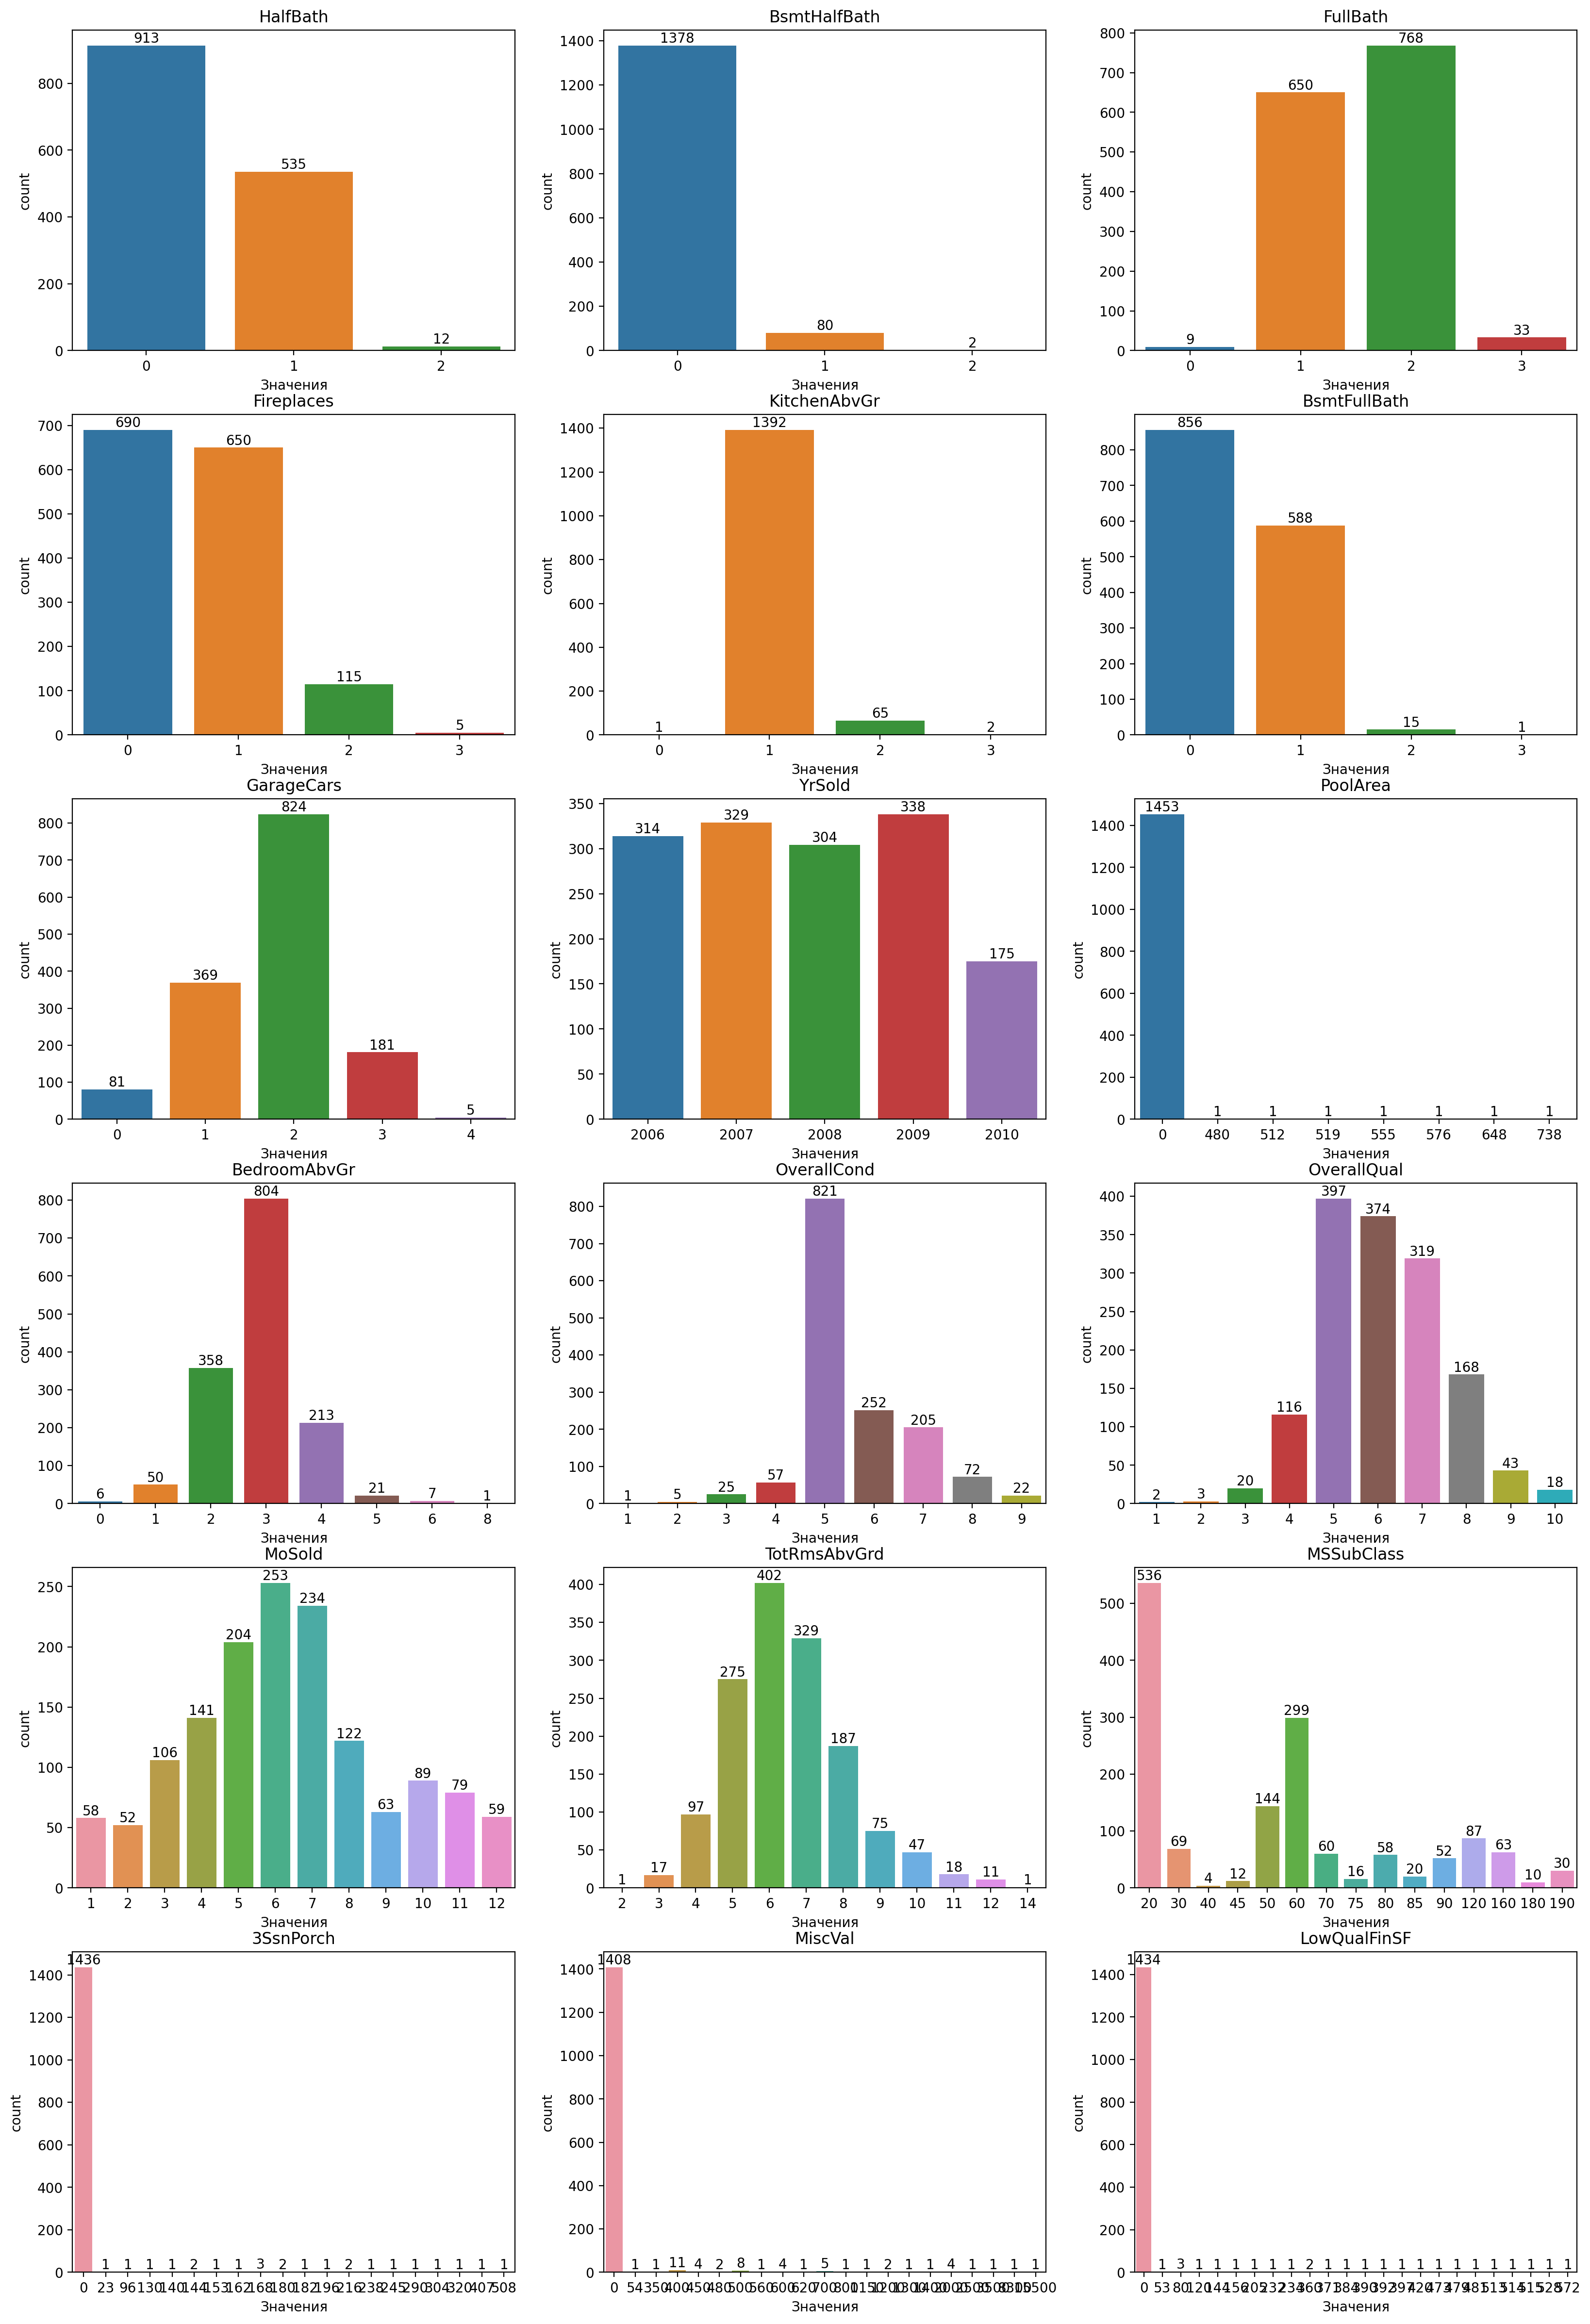

In [140]:
fig,axes= plt.subplots(6,3,figsize=(20,30))
for i,ax in enumerate(axes.flatten()):
    
    sns.countplot(x=numeric_dt.loc[:,num_cat.index].iloc[:,i],ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(numeric_dt.loc[:,num_cat.index].columns[i])
    ax.set_xlabel('Значения')

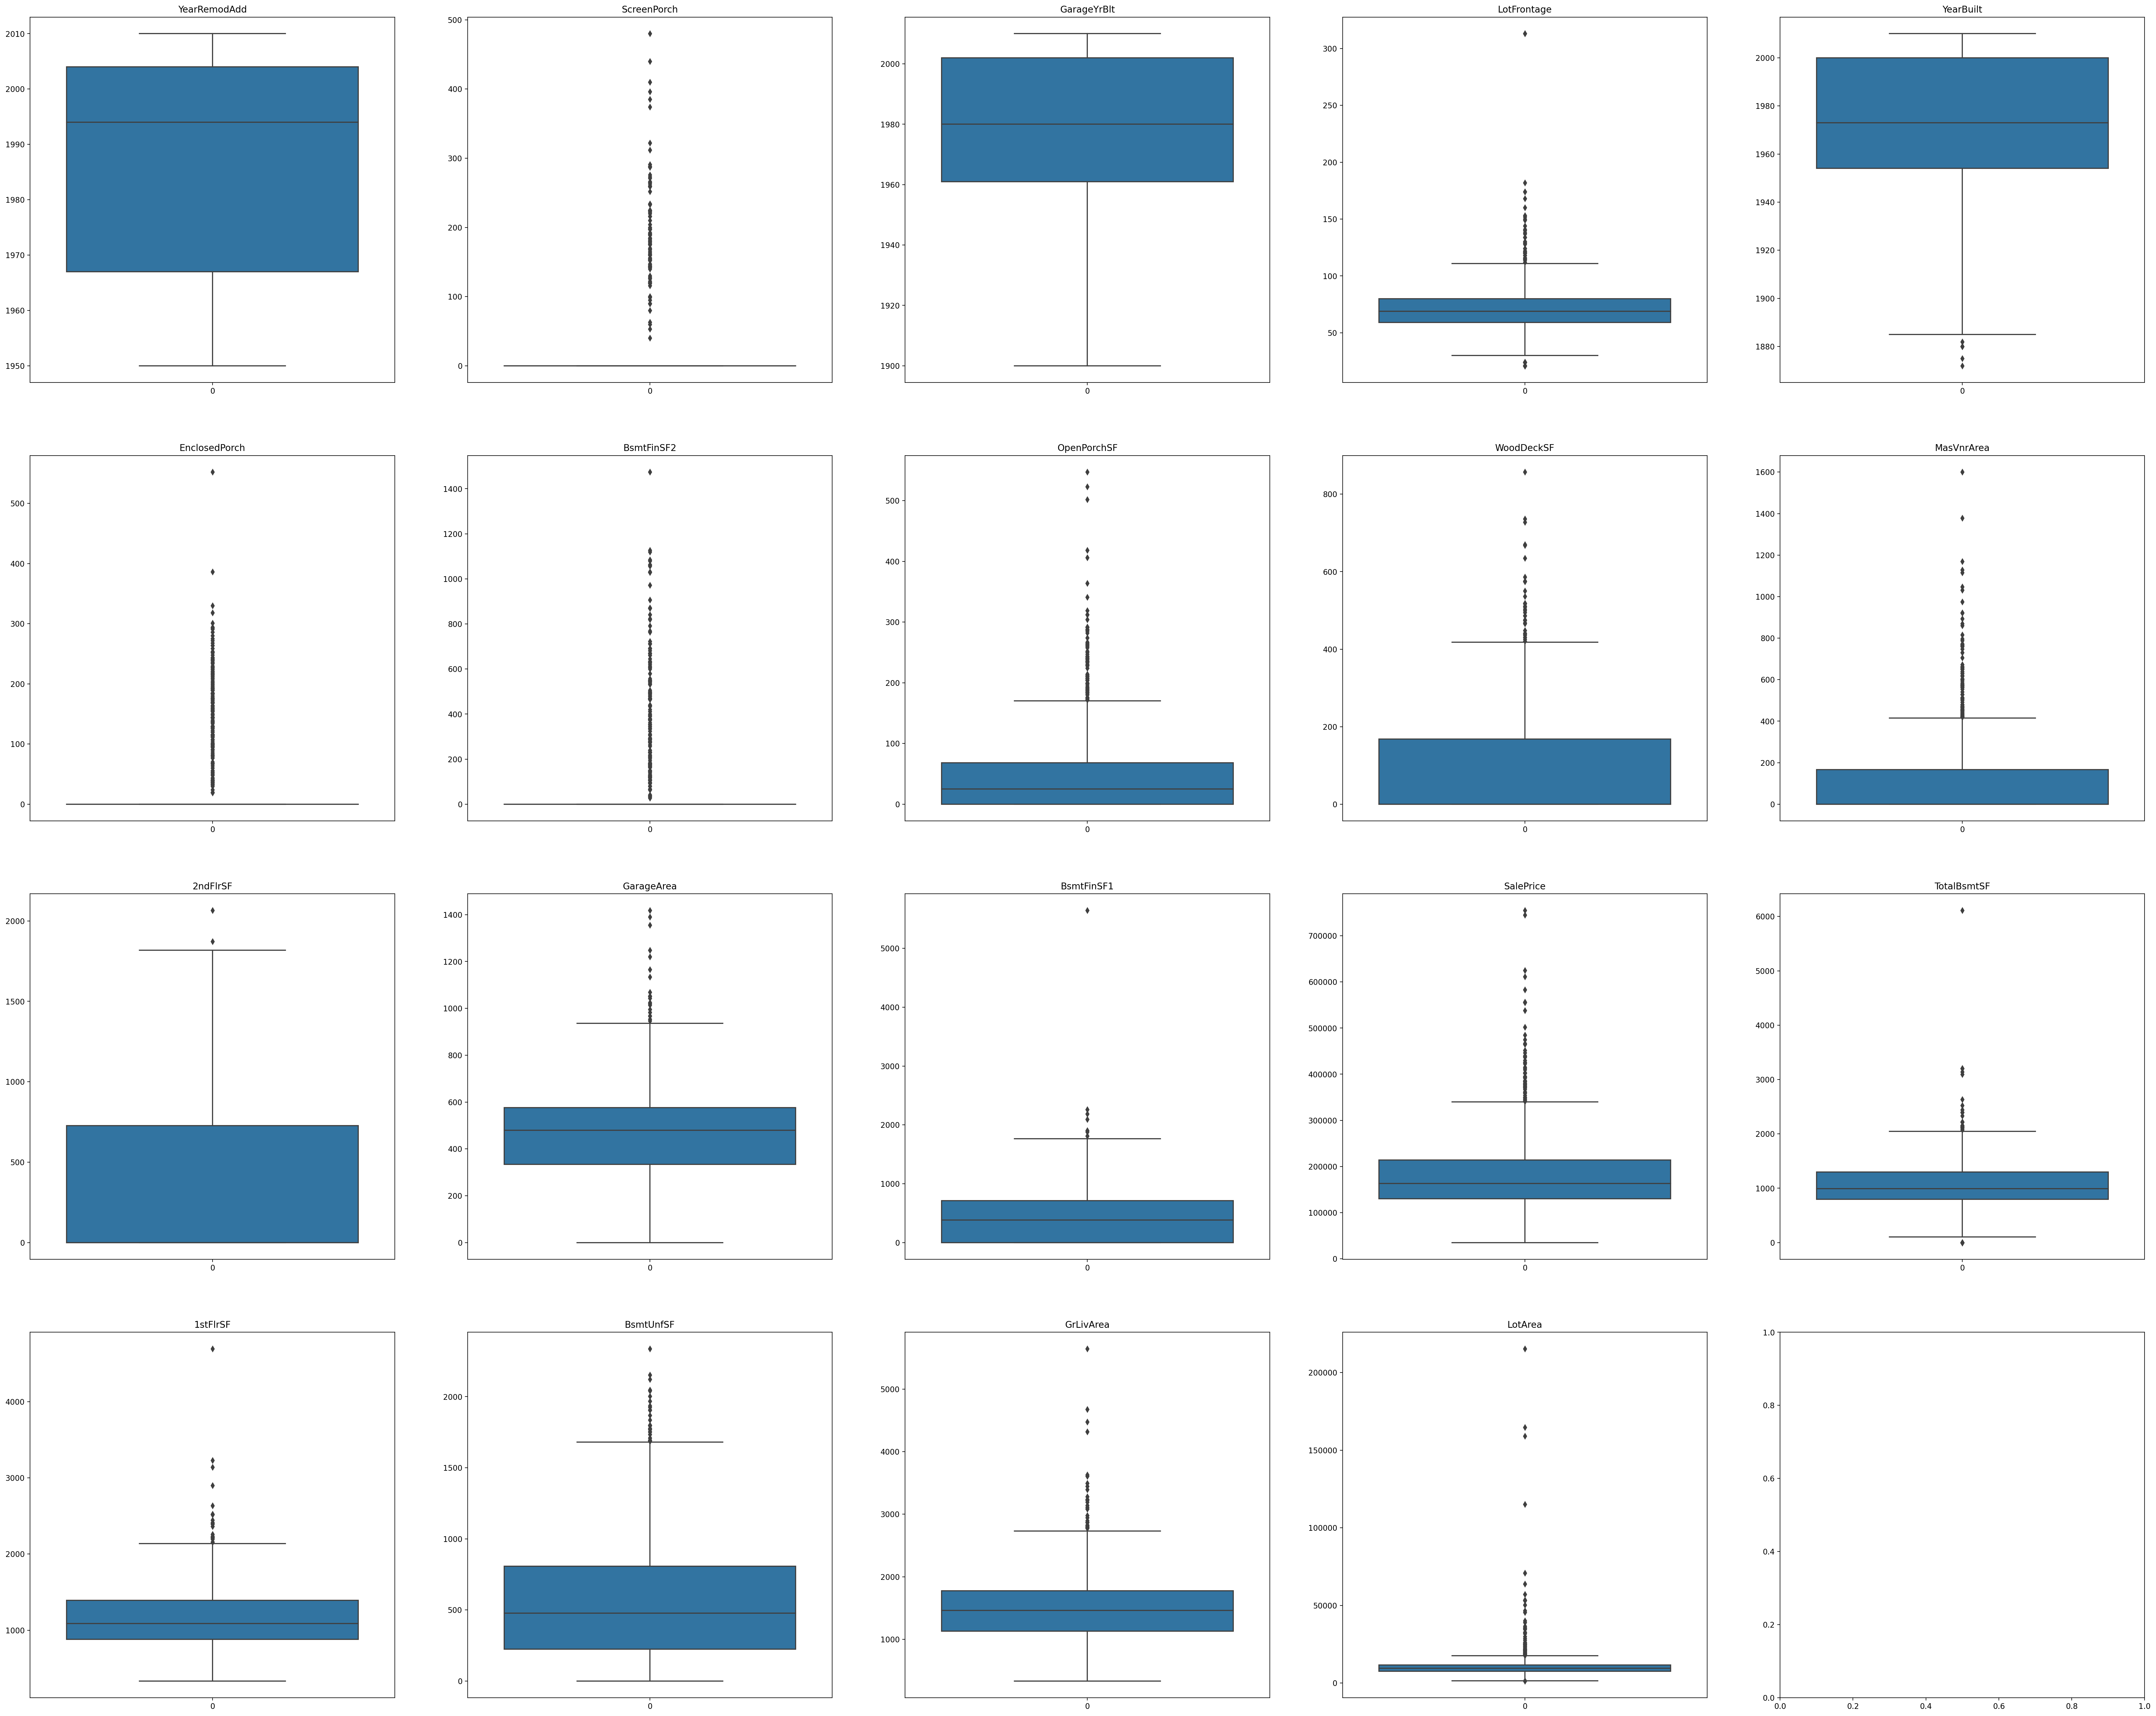

In [114]:
fig,axes= plt.subplots(4,5,figsize=(50,40))
for i,ax in enumerate(axes.flatten()[:-1]):
    sns.boxplot(data=numeric_dt.loc[:,num_num.index].iloc[:,i],ax=ax)
    ax.set_title(numeric_dt.loc[:,num_num.index].columns[i])

## Hist

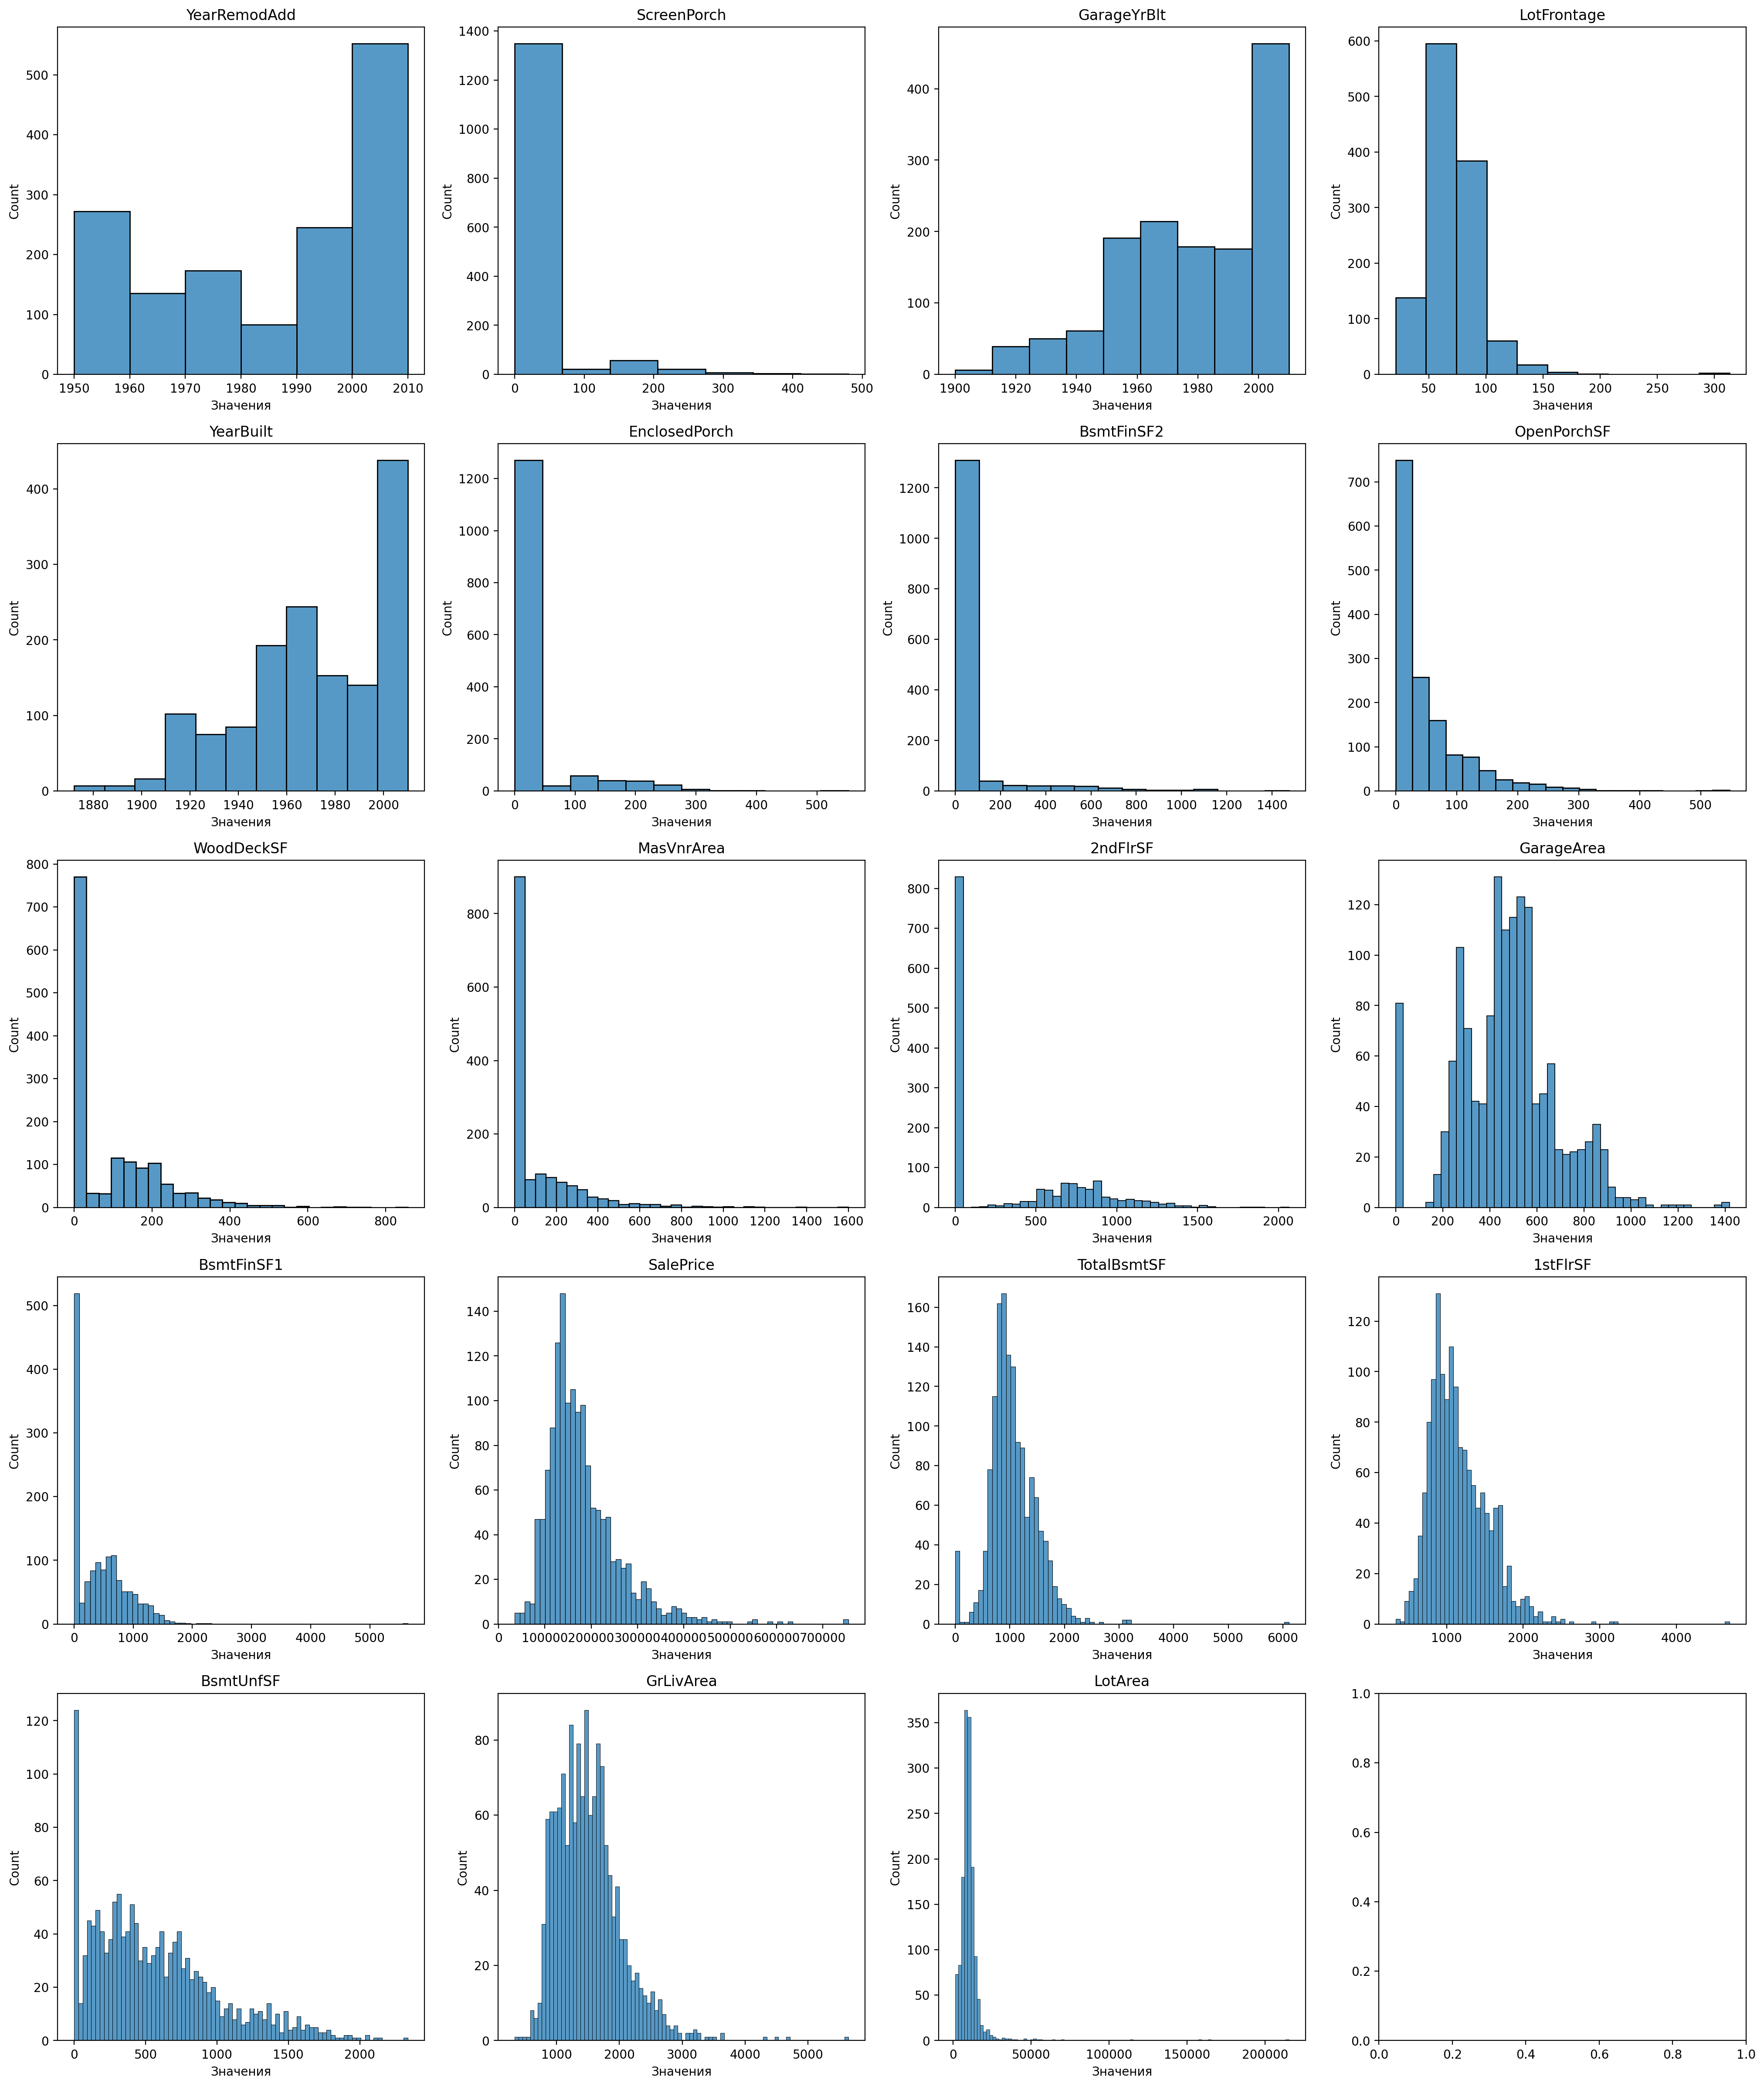

In [148]:
fig,axes= plt.subplots(5,4,figsize=(25,30))
for i,ax in enumerate(axes.flatten()[:-1]):
    sns.histplot(data=numeric_dt.loc[:,num_num.index].iloc[:,i],bins=num_num.iloc[i]//10,ax=ax)
    ax.set_title(numeric_dt.loc[:,num_num.index].columns[i])
    ax.set_xlabel('Значения')

## Вывод гистограмм

> Вывод

In [68]:
numeric_dt.nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
FullBath            4
BsmtFullBath        4
Fireplaces          4
KitchenAbvGr        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

In [6]:
num_des=train.describe(include=np.number).T
cat_des=train.describe(include=np.object_).T
num_des

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [46]:
cat_des['top_perc']=cat_des['freq']/cat_des['count']
cat_des.sort_values(by=['top_perc'],ascending=False,inplace=True)
cat_des.head(10)
val_counts = pd.DataFrame()
for feature in cat_des.head(10).index:
    val_counts=pd.concat([val_counts,pd.Series({feature+':':train[feature].count()})])
    val_counts=pd.concat([val_counts,train[feature].value_counts()],axis=0)
    #val_counts=
val_counts

,0
Utilities:,1460.0
AllPub,1459.0
NoSeWa,1.0
Street:,1460.0
Pave,1454.0
Grvl,6.0
Condition2:,1460.0
Norm,1445.0
Feedr,6.0
Artery,2.0


In [ ]:
#np.where(,-1,train.columns
nums=np.intersect1d(train.columns,num_des.index)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706,0,1,0,150,0,...,7,0,208500,0,8,856,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,...,6,0,181500,0,6,1262,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,...,7,0,223500,0,6,920,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,...,7,0,140000,0,7,756,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,...,8,0,250000,0,9,1145,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0,0,0,0,953,0,...,6,0,175000,0,7,953,0,1999,2000,2007
1456,2073,0,0,3,790,163,1,0,589,0,...,6,0,210000,0,7,1542,349,1978,1988,2010
1457,1188,1152,0,4,275,0,0,0,877,0,...,7,0,266500,0,9,1152,0,1941,2006,2010
1458,1078,0,0,2,49,1029,1,0,0,112,...,5,0,142125,0,5,1078,366,1950,1996,2010


,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
...,...,...
1455,Norm,Norm
1456,Norm,Norm
1457,Norm,Norm
1458,Norm,Norm
